Bibliotecas Importadas

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
from datetime import datetime, time

In [29]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-15 23:38:12


Carregando os dados

In [30]:
path_treino = 'drive/MyDrive/Colab Notebooks/Deep Learning/fruits-15/Training' 
path_teste = 'drive/MyDrive/Colab Notebooks/Deep Learning/fruits-15/Test'

In [31]:
def get_dados(path):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = img_to_array(load_img(arquivo, target_size=(100, 100)))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [32]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [33]:
X_frutas, Y_frutas = get_dados(path_treino)

0 - Apple Red 1
1 - Blueberry
2 - Banana
3 - Papaya
4 - Lemon
5 - Maracuja
6 - Mango
7 - Cherry 2
8 - Kiwi
9 - Grape Blue
10 - Orange
11 - Pear
12 - Pineapple
13 - Raspberry
14 - Strawberry


In [34]:
X_train = np.asarray(X_frutas).astype(np.float32)
Y_train = np.asarray(Y_frutas)

In [35]:
X_train.shape

(8039, 100, 100, 3)

In [36]:
X_train = X_train.astype('float32')/255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [37]:
Y_train.shape

(8039,)

In [38]:
num_frutas = len(list(set(Y_train)))
print(num_frutas)
Y_train = to_categorical(Y_train, num_frutas)

15


In [44]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(320, (10, 10), input_shape=(100, 100, 3), activation='relu'))#
print( model.output_shape)
#Camada de Pooling 	    
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(640, (10, 10), activation='relu'))
print( model.output_shape)
#Camada de Pooling 	
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)
#Remove 20% das ativações de entrada aleatoriamente 
model.add(Dropout(0.2))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print(model.output_shape)
model.add(Dense(1000, activation='sigmoid'))
print(model.output_shape)
model.add(Dense(500, activation='sigmoid'))
print(model.output_shape)
model.add(Dense(250, activation='sigmoid'))
print(model.output_shape)
#Função de Ativação Softmax
model.add(Dense(num_frutas, activation='softmax'))
print(model.output_shape)

(None, 91, 91, 320)
(None, 45, 45, 320)
(None, 36, 36, 640)
(None, 18, 18, 640)
(None, 207360)
(None, 1000)
(None, 500)
(None, 250)
(None, 15)


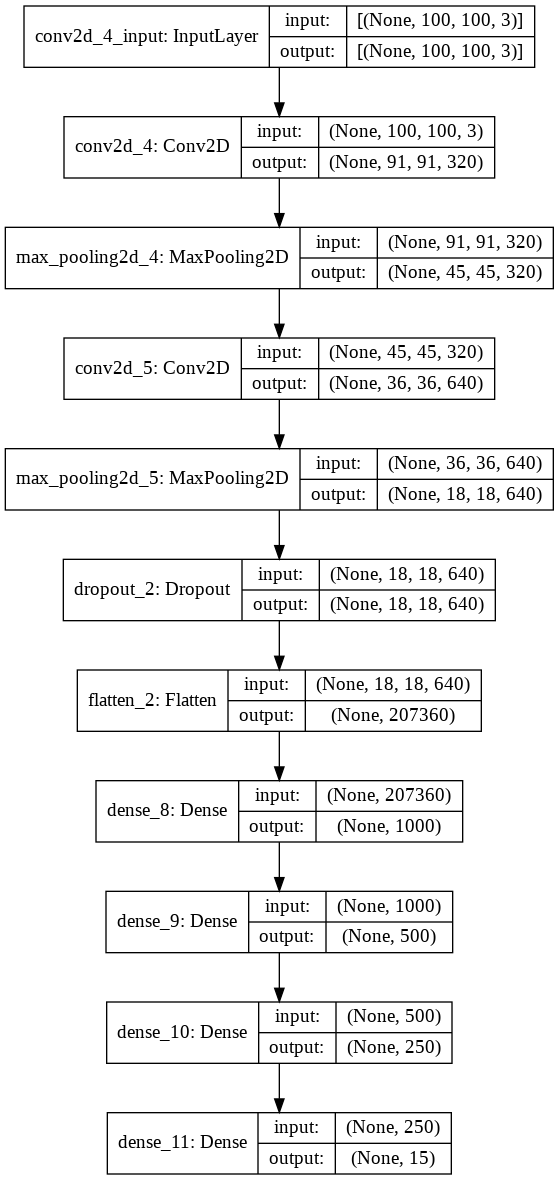

In [45]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=10, batch_size=100)

Epoch 1/10
 8/65 [==>...........................] - ETA: 3:16:13 - loss: 2.6437 - accuracy: 0.1380

KeyboardInterrupt: ignored

In [ ]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]))

In [ ]:
X_frutas, Y_frutas = get_dados(path_teste)

In [ ]:
X_test = np.asarray(X_frutas).astype(np.float32)
Y_test = np.asarray(Y_frutas)

In [ ]:
X_test = X_test.astype('float32')/255

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]))

In [ ]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))